<a href="https://colab.research.google.com/github/rjhalliday/python-anomaly-detection/blob/main/isolationforest_log_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Example anomaly detection with isolatio forest.

Normal Amounts:
        amount  timestamp
0    59.934283 2024-01-01
1    47.234714 2024-01-02
2    62.953771 2024-01-03
3    80.460597 2024-01-04
4    45.316933 2024-01-05
..         ...        ...
995  44.377994 2026-09-22
996  85.953731 2026-09-23
997  62.816857 2026-09-24
998  38.576420 2026-09-25
999  61.451656 2026-09-26

[1000 rows x 2 columns]
Anomalous Amounts:
        amount  timestamp
0   269.967772 2026-09-15
1   246.231684 2026-09-16
2   202.981518 2026-09-17
3   167.653161 2026-09-18
4   234.911166 2026-09-19
5   219.674269 2026-09-20
6   244.759661 2026-09-21
7   231.758590 2026-09-22
8   252.477636 2026-09-23
9   173.238239 2026-09-24
10  265.869703 2026-09-25
11  209.879980 2026-09-26
12  303.763044 2026-09-27
13  165.540609 2026-09-28
14  286.798190 2026-09-29
15  209.895539 2026-09-30
16  167.429100 2026-10-01
17  175.805708 2026-10-02
18  183.982635 2026-10-03
19  221.208297 2026-10-04
20  226.141774 2026-10-05
21  171.315000 2026-10-06
22  198.782270 2026-10-07
23  

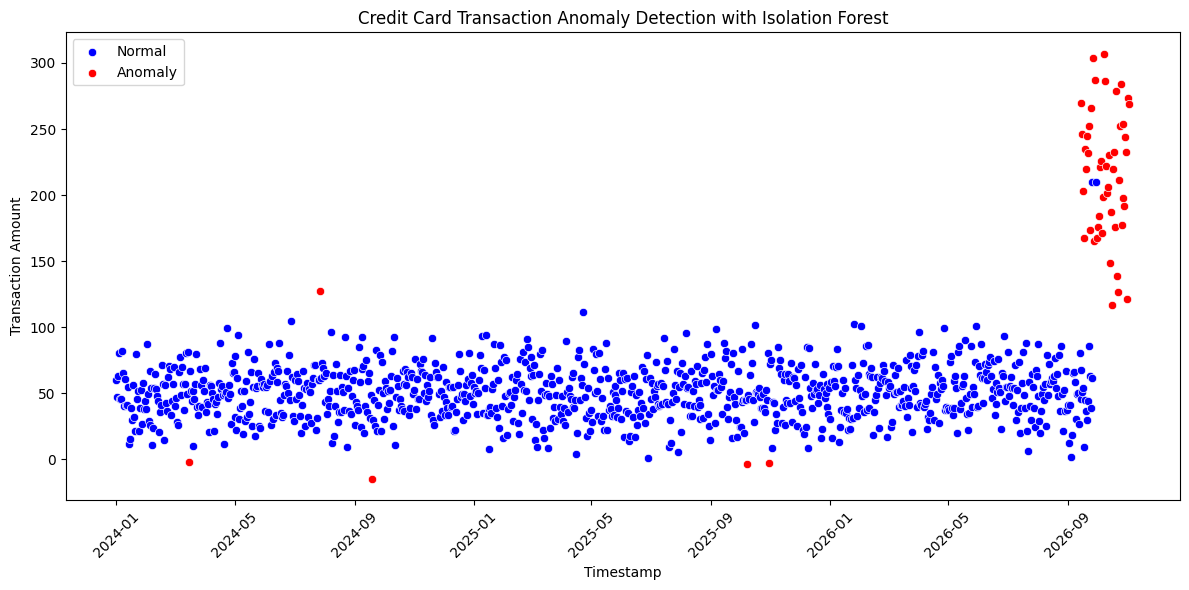

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Mock Credit Card Transaction Data
np.random.seed(42)  # For reproducibility

# Generate normal transactions
num_normal = 1000
amounts_normal = np.random.normal(loc=50, scale=20, size=num_normal)  # Normal transactions around $50, standard deviation 20
timestamps_normal = pd.date_range(start='2024-01-01', periods=num_normal, freq='D')

# Generate fraudulent transactions
num_anomalies = 50
amounts_anomalies = np.random.normal(loc=200, scale=50, size=num_anomalies)  # Fraudulent transactions around $200
timestamps_anomalies = pd.date_range(start='2026-09-15', periods=num_anomalies, freq='D')

# print a table of normal amounts and timestamps
print("Normal Amounts:")
print(pd.DataFrame({'amount': amounts_normal, 'timestamp': timestamps_normal}))

# print a table of anomalous amounts and timestamps
print("Anomalous Amounts:")
print(pd.DataFrame({'amount': amounts_anomalies, 'timestamp': timestamps_anomalies}))

# Combine normal and anomalous data
amounts = np.concatenate([amounts_normal, amounts_anomalies])
timestamps = np.concatenate([timestamps_normal, timestamps_anomalies])

# Create DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'amount': amounts
})

# Display the first few rows of the DataFrame
print("Original Data:")
print(df.head())

# Step 2: Initialize and Fit the Isolation Forest Model
# Create Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # 5% contamination

# Fit the model
df['amount'] = df['amount'].values.reshape(-1, 1)  # Reshape for a single feature
model.fit(df[['amount']])

# Step 3: Predict Anomalies
# Predict anomalies
df['anomaly'] = model.predict(df[['amount']])

# Convert prediction to readable labels
df['anomaly'] = df['anomaly'].map({1: 'normal', -1: 'anomaly'})

# Display the DataFrame with anomalies
print("\nData with Anomaly Detection Results:")
print(df.head())

# Step 4: Visualization
# Plotting the results
plt.figure(figsize=(12, 6))

# Plot normal transactions
normal_data = df[df['anomaly'] == 'normal']
sns.scatterplot(x='timestamp', y='amount', data=normal_data, label='Normal', color='blue')

# Plot anomalies
anomalies = df[df['anomaly'] == 'anomaly']
sns.scatterplot(x='timestamp', y='amount', data=anomalies, label='Anomaly', color='red')

plt.title('Credit Card Transaction Anomaly Detection with Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
